In [1]:
import pandas as pd

In [2]:
countries = pd.read_csv('countries.csv')

In [3]:
countries.head(5)

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,...,0.0,0.000000e+00,29928987,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
1,Albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,...,2000.0,1.855000e+08,3563112,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
2,Algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.120000e+11,...,1200000.0,1.187000e+10,32531853,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
3,American Samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,...,0.0,NaN,57881,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0
4,Andorra,468,9.00,NaN,6.07,NaN,NaN,NaN,5.800000e+07,1.900000e+09,...,NaN,NaN,70549,NaN,NaN,NaN,35000.0,23500.0,1.29,0.0


In [ ]:
# Data Cleansing

In [5]:
# Checking for missing values in Internet users column
missing_internet_users = countries["Internet users"].isna().sum()
print("Missing values in Internet users column:", missing_internet_users)

# Checking for missing values in Electricity consumption column
missing_electricity_consumption = countries["Electricity - consumption(kWh)"].isna().sum()
print("Missing values in Electricity consumption column:", missing_electricity_consumption)

Missing values in Internet users column: 16
Missing values in Electricity consumption column: 16


In [7]:
# Filtering the dataset to only include rows with missing values in the "Internet users" column
missing_internet_users = countries[countries['Internet users'].isnull()]

# Country names with missing values in the "Internet users" column
print("Countries with missing values in Internet users column:")
print(missing_internet_users['Country'])

Countries with missing values in Internet users column:
3                         American Samoa
58                            East Timor
67     Falkland Islands (Islas Malvinas)
87                              Guernsey
105                               Jersey
110                          Korea North
131                          Man Isle of
136                              Mayotte
142                           Montserrat
155                                 Niue
156             Northern Mariana Islands
160                                Palau
177            Saint Pierre and Miquelon
206                              Tokelau
212             Turks and Caicos Islands
227                       Western Sahara
Name: Country, dtype: object


In [8]:
# Filtering the dataset to only include rows with missing values in the "Electricity - consumption (kWh)" column
missing_electricity_consumption = countries[countries['Electricity - consumption(kWh)'].isnull()]

# Display the country names with missing values in the "Electricity consumption" column
print("\nCountries with missing values in Electricity consumption column:")
print(missing_electricity_consumption['Country'])


Countries with missing values in Electricity consumption column:
4                       Andorra
58                   East Timor
76                   Gaza Strip
87                     Guernsey
120               Liechtenstein
131                 Man Isle of
132            Marshall Islands
136                     Mayotte
140                      Monaco
156    Northern Mariana Islands
160                       Palau
180                  San Marino
206                     Tokelau
213                      Tuvalu
225           Wallis and Futuna
226                   West Bank
Name: Country, dtype: object


In [23]:
# Removing rows with missing values from both columns
countries = countries.dropna(subset=['Internet users', 'Electricity - consumption(kWh)'])

In [12]:
# Non-missing values in each column
non_missing_internet_users = countries['Internet users'].count()
non_missing_electricity_consumption = countries['Electricity - consumption(kWh)'].count()

print("Non-missing values in Internet users column:", non_missing_internet_users)
print("Non-missing values in Electricity consumption column:", non_missing_electricity_consumption)

Non-missing values in Internet users column: 206
Non-missing values in Electricity consumption column: 206


In [14]:
# Non-missing values in Population column
non_missing_population = countries['Population'].count()

print("Non-missing values in Population column:", non_missing_population)

Non-missing values in Population column: 206


In [15]:
# Calculating internet usage rate per capita
countries['Internet usage rate per capita'] = countries['Internet users'] / countries['Population']

# Calculating electricity consumption per capita
countries['Electricity consumption per capita'] = countries['Electricity - consumption(kWh)'] / countries['Population']

In [ ]:
# Data Visualization

In [16]:
import matplotlib.pyplot as plt

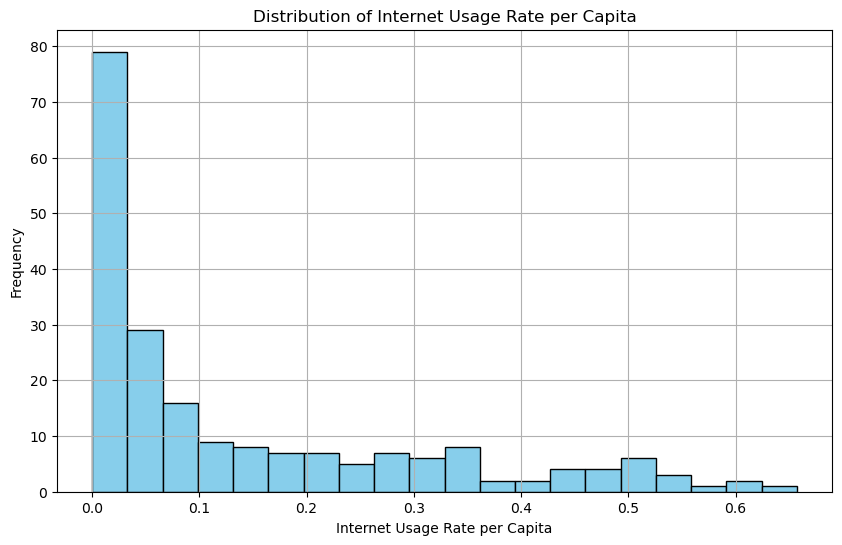

In [32]:
# Histogram for internet usage rate per capita
plt.figure(figsize=(10, 6))
plt.hist(countries['Internet usage rate per capita'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Internet Usage Rate per Capita')
plt.xlabel('Internet Usage Rate per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

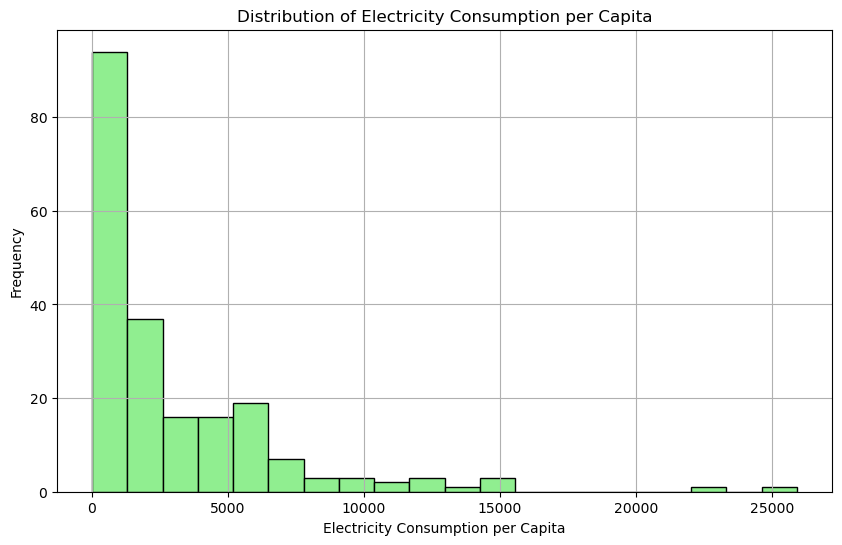

In [18]:
# Histogram for electricity consumption per capita
plt.figure(figsize=(10, 6))
plt.hist(countries['Electricity consumption per capita'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Electricity Consumption per Capita')
plt.xlabel('Electricity Consumption per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

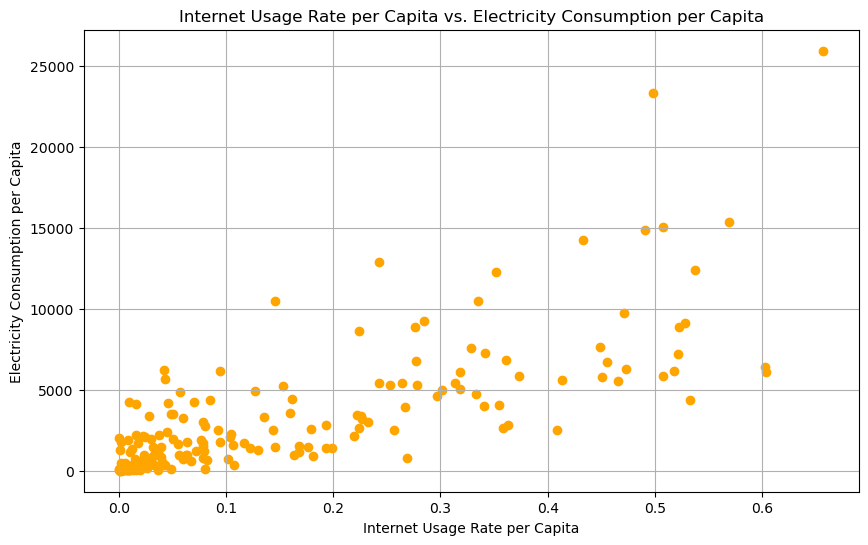

In [19]:
# Scatter plot for internet usage rate per capita vs. electricity consumption per capita
plt.figure(figsize=(10, 6))
plt.scatter(countries['Internet usage rate per capita'], countries['Electricity consumption per capita'], color='orange')
plt.title('Internet Usage Rate per Capita vs. Electricity Consumption per Capita')
plt.xlabel('Internet Usage Rate per Capita')
plt.ylabel('Electricity Consumption per Capita')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13228\3118865916.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(countries['Internet usage rate per capita'], shade=True, color='skyblue')


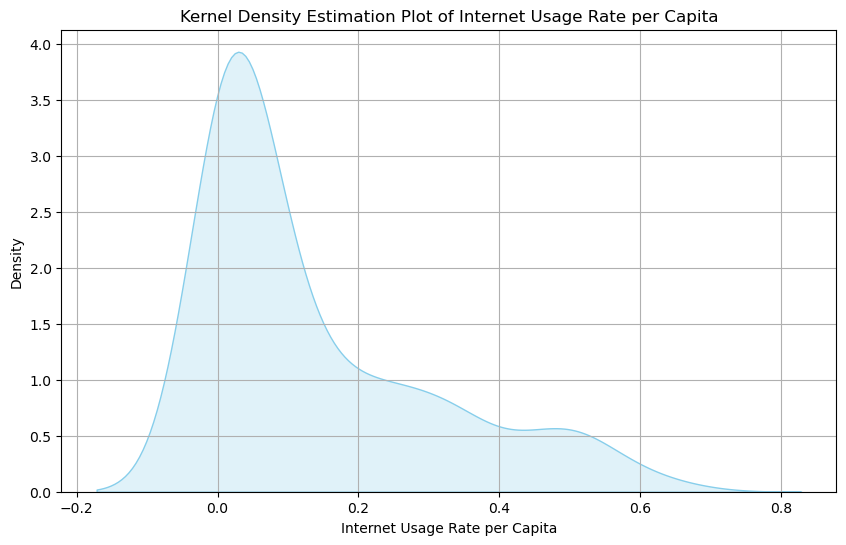

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(countries['Internet usage rate per capita'], shade=True, color='skyblue')
plt.title('Kernel Density Estimation Plot of Internet Usage Rate per Capita')
plt.xlabel('Internet Usage Rate per Capita')
plt.ylabel('Density')
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13228\2843029259.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(countries['Electricity consumption per capita'], shade=True, color='lightgreen')


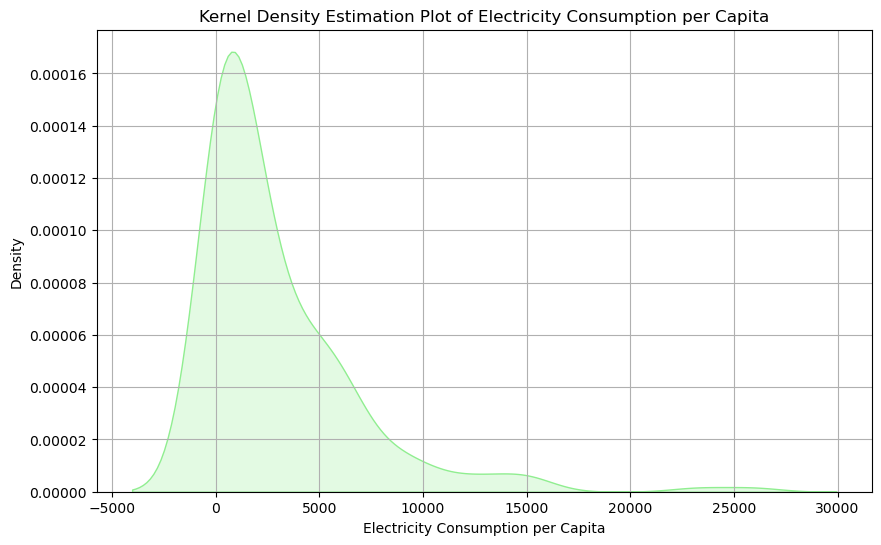

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(countries['Electricity consumption per capita'], shade=True, color='lightgreen')
plt.title('Kernel Density Estimation Plot of Electricity Consumption per Capita')
plt.xlabel('Electricity Consumption per Capita')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
# Statistical testing for the hypothesis

In [34]:
# Correlation coefficient
correlation_coefficient = countries['Internet usage rate per capita'].corr(countries['Electricity consumption per capita'])

print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: 0.7744302007303822
